# Cartopy tutorial: Transforming vector to vector

[Introduction](../../introduction.ipynb) > [Geospatial data](../geospatial_data.ipynb) > Vector to vector

## Transforming coordinate values (points)
Conversion of a point in one coordinate system to another is an example of a vector-to-vector transformation.

In cartopy we can convert points from one coordinate system to another using the [transform_point](https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.CRS.transform_point) and [transform_points](https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.CRS.transform_points) methods on a CRS.

In [1]:
import cartopy.crs as ccrs

In [2]:
osgb = ccrs.OSGB()
geod = ccrs.Geodetic()

# Convert from Ordnance Survey GB to lon/lat:
easting = 291813.424
northing = 92098.387

lon, lat = geod.transform_point(
    x=easting, y=northing, src_crs=osgb)
print(lon, lat)

-3.533885175986329 50.71841091955379


## Projecting lines

When it comes to "transforming" a line or other geometry, we could choose to manually transform each of the vertices, but that requires us to deal with things like the antimeridian and appropriate interpolation.

Cartopy has functionality specifically designed for this purpose. It uses a numerical tolerance to determine appropriate interpolation and whether to "cut" a line because it crossed the antimeridian or a map boundary.

Because this is a numerical approximation and not an exact transformation, the name of the method on a cartopy Projection is [project_geometry](https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.Projection.project_geometry):

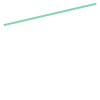

In [3]:
import shapely.geometry as sgeom

new_york = [-74.0060, 40.7128]
honolulu = [-157.8583, 21.3069]

line = sgeom.LineString([new_york, honolulu])
pc = ccrs.PlateCarree()

lines = pc.project_geometry(line, pc)
lines

That wasn't too exciting, but let's take a look at it on a map:

<IPython.core.display.Javascript object>


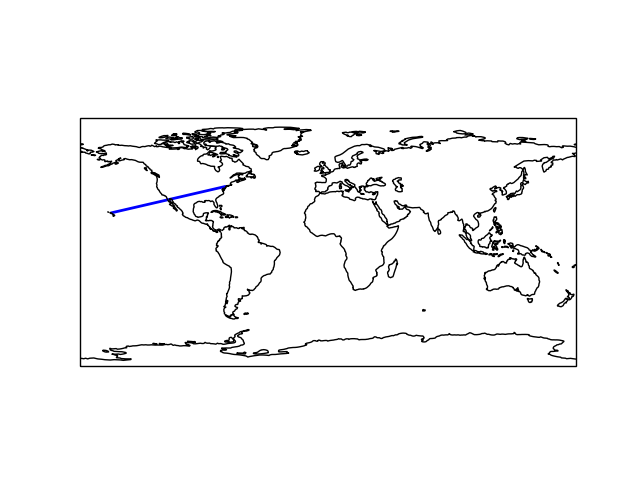

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection=pc)
ax.add_geometries(
    [lines], pc,
    edgecolor='blue', facecolor='none', lw=2)
ax.coastlines()
plt.show()

If we wanted to represent the line as a great circle rather than a straight line in projected (Plate Carree) space we can change the source CRS to Geodetic:

<IPython.core.display.Javascript object>


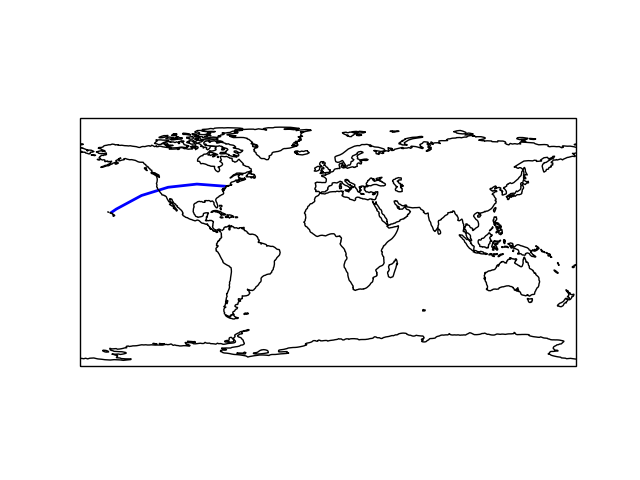

In [5]:
# Project the Geodetic line to PlateCarree
# coordinates (including an interpolation).
lines = pc.project_geometry(line, geod)

plt.figure()
ax = plt.axes(projection=pc)
ax.add_geometries(
    [lines], pc,
    edgecolor='blue', facecolor='none', lw=2)
ax.coastlines()
plt.show()

**Exercise 4.1**: Construct a LineString between Yokohama (139.64, 35.44) and San Fransisco (-122.42, 37.77).
Project this line using ``project_geometry`` using both Plate Carree and Geodetic as the source coordinate system. Plot the lines using cartopy and observe how they differ.

*Extension*: Devise a way of constructing the LineString such that it crosses the antimeridian when using ``project_geometry`` and Plate Carree.

<IPython.core.display.Javascript object>


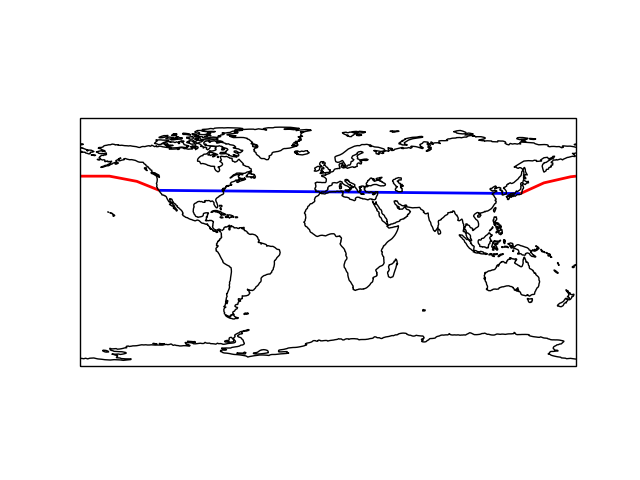

In [6]:
# EXERCISE 4.1:
line = sgeom.LineString([(139.6380, 35.4437), (-122.4194, 37.7749)])
pc = ccrs.PlateCarree()

pc_lines = pc.project_geometry(line, ccrs.PlateCarree())
geod_lines = pc.project_geometry(line, ccrs.Geodetic())

plt.figure()
ax = plt.axes(projection=pc)

# Add the Plate Carree line in blue
ax.add_geometries(
    [pc_lines], pc,
    edgecolors='blue', facecolor='none', lw=2)

# Add the Geodetic line in red
ax.add_geometries(
    [geod_lines], pc,
    edgecolors='red', facecolor='none', lw=2)

ax.coastlines()
plt.show()


<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 4.1</b></summary>
<pre>
line = sgeom.LineString([(139.6380, 35.4437), (-122.4194, 37.7749)])
pc = ccrs.PlateCarree()

pc_lines = pc.project_geometry(line, ccrs.PlateCarree())
geod_lines = pc.project_geometry(line, ccrs.Geodetic())

plt.figure()
ax = plt.axes(projection=pc)

# Add the Plate Carree line in blue
ax.add_geometries(
    [pc_lines], pc,
    edgecolors='blue', facecolor='none', lw=2)

# Add the Geodetic line in red
ax.add_geometries(
    [geod_lines], pc,
    edgecolors='red', facecolor='none', lw=2)

ax.coastlines()
plt.show()
</pre>

The major difference between these two projected lines is that the Geodetic line takes the shortest route from A to B, whereas the Plate Carree line takes the cartesian route from A to B. 

</details>

<IPython.core.display.Javascript object>


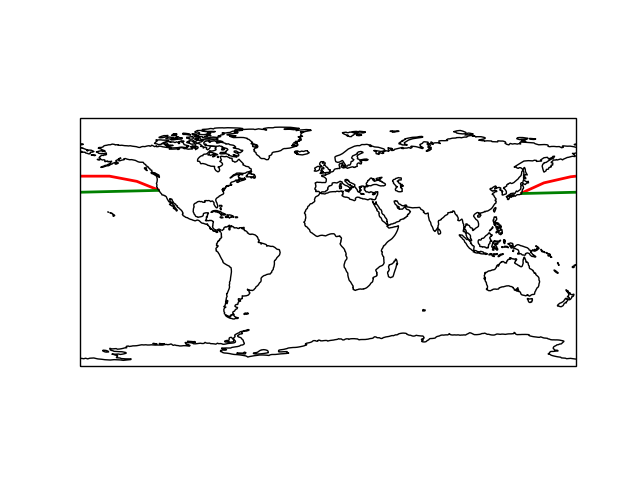

In [7]:
# EXERCISE 4.1 extension
pc_shortest_line = sgeom.LineString(
    [(139.6380, 35.4437), (-122.4194 + 360, 37.7749)])
pc = ccrs.PlateCarree()

pc_shortest_lines = pc.project_geometry(
    pc_shortest_line, ccrs.PlateCarree())

plt.figure()
ax = plt.axes(projection=pc)

# Add the Geodetic line in red
ax.add_geometries(
    [geod_lines], pc,
    edgecolors='red', facecolor='none', lw=2)

ax.add_geometries(
    [pc_shortest_lines], pc,
    edgecolors='green', facecolor='none', lw=2)

ax.coastlines()
plt.show()


<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 4.1 extension</b></summary>
    
Given that the Plate Carree line follows the cartesian route, we need to modify the input coordinates to reflect the fact that the route shouldn't be nearly 200 degrees of longitude long. A quick fix is to add 360 to the second x coordinate value:
<pre>
pc_shortest_line = sgeom.LineString(
    [(139.6380, 35.4437), (-122.4194 + 360, 37.7749)])
pc = ccrs.PlateCarree()

pc_shortest_lines = pc.project_geometry(
    pc_shortest_line, ccrs.PlateCarree())

plt.figure()
ax = plt.axes(projection=pc)

# Add the Geodetic line in red
ax.add_geometries(
    [geod_lines], pc,
    edgecolors='red', facecolor='none', lw=2)

ax.add_geometries(
    [pc_shortest_lines], pc,
    edgecolors='green', facecolor='none', lw=2)

ax.coastlines()
plt.show()
</pre>
</details>

## Projecting geometries

Projecting geometries is much the same as projecting lines. Let's construct a circle of radius 20 degrees to demonstrate:

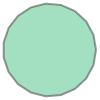

In [8]:
import numpy as np

npts = 20
radius = 20
phi = np.linspace(0, 2*np.pi, npts)
coords = np.stack([np.cos(phi), np.sin(phi)], axis=-1)
circle = sgeom.Polygon(coords * radius)
circle

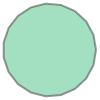

In [9]:
prj_circle = pc.project_geometry(circle, geod)
prj_circle

To really see the power of this, let's project this geometry to a Plate Carree shifted by 180 degrees:

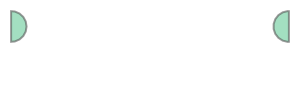

In [10]:
pc_180 = ccrs.PlateCarree(central_longitude=180)
prj_circle = pc_180.project_geometry(circle, geod)
prj_circle

See how cartopy has realised that it needs to cut the circle up. We can see precisely why when we look at the map:

<IPython.core.display.Javascript object>


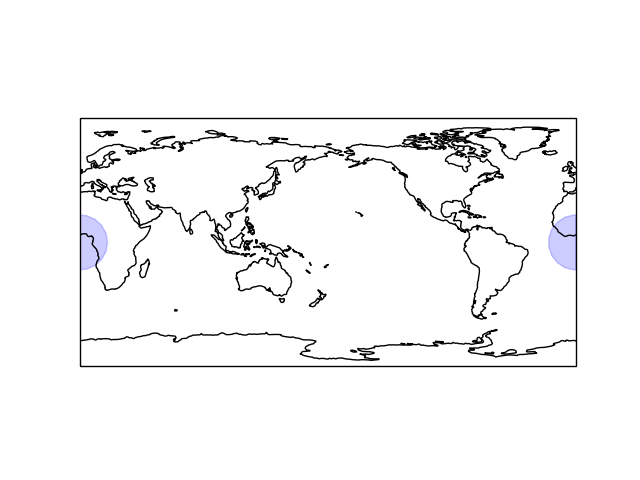

In [11]:
plt.figure()
ax = plt.axes(projection=pc_180)
ax.add_geometries(
    [prj_circle], pc_180,
    edgecolor='blue', facecolor='blue', alpha=0.2)
ax.coastlines()
plt.show()

On the sphere the winding order of a polygon is important. Cartopy uses a counter-clockwise (CCW) winding order to be consistent with the [simple geometries](https://gis.stackexchange.com/a/147971/9354) conventions. If we reverse the order of the circle's coordinates and project that, we get a very different (but equally valid) polygon:

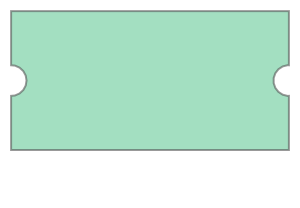

In [12]:
inverse_circle = sgeom.Polygon(coords[::-1] * radius)
pc_180 = ccrs.PlateCarree(central_longitude=180)
pc_180.project_geometry(inverse_circle, geod)

## Geographical distances (Geodesic distances)

Another common vector-to-vector transformation is to compute distances between two points on the sphere.

Cartopy wraps [GeographicLib](https://sourceforge.net/projects/geographiclib/) in ``cartopy.geodesic`` to give this functionality.
(**Note**: this interface is entirely undocumented, and it *could* change in the future)

In general, it is possible to [reduce geodesic problems](https://en.wikipedia.org/wiki/Geodesics_on_an_ellipsoid#Geodesics_on_an_ellipsoid_of_revolution) into one of two types:
* the **direct geodesic problem**, given an end-point, [forward-azimuth](https://www.youtube.com/watch?v=E4peQBZd8v4) and geodesic length, determine the destination end-point and its forward-azimuth
* the **inverse geodesic problem**, given two end-points, determine the connecting geodesic length and associated forward-azimuths

We will use the *inverse geodesic solution* to determine the distances between points on a sphere.

In [13]:
import cartopy.geodesic

geod = cartopy.geodesic.Geodesic()

nyc = [-73.9866136, 40.7306458]
london = [-0.1276474, 51.5073219]

# Solve the "inverse" Geodetic problem to compute the distance
# between two points. This solution is more accurate than
# the traditional Vincenty formulation.
distance, azi_0, azi_1 = np.array(geod.inverse(nyc, london).T)

print('Geodesic distance between NYC and London: {:.0f}km'
      .format(distance[0] / 1000))

Geodesic distance between NYC and London: 5583km


We can compute multiple distances at the same time. Let's use that to compute distances along a line:

In [14]:
san_fran = [-122.4629897, 37.7647993]
track = [san_fran, nyc, london]

distances, azi_0, azi_1 = np.array(
    geod.inverse(track[:-1], track[1:]).T)

print('Segment distances (m): ', distances)

print('Geodesic distance between San Fransisco and '
      'London (via NYC): {:.0f}km'
      .format(distances.sum() / 1000))

Segment distances (m):  [4144339.97629077 5582728.55686424]
Geodesic distance between San Fransisco and London (via NYC): 9727km


**Exercise 4.2**: Given that Fogg travels through each of the places in given dictionary of places, what is the minimum approximate average speed (in km/h) that Fogg must travel in order to achieve his 80 day target?

*Reminder:* Fogg plans to depart from London, and his main stops are planned to be: Suez, Bombay, Calcutta, Hong-Kong, Yokohama, San Fransisco, New York City, London.

*Extension*: Assuming Fogg plans to arrive after exactly 80 days, and that he travels at a constant speed along the route, compute how many days into his journey he will be when he arrives at each of the main stops.

In [15]:
# Some approximate locations of each of the cities are provided.
places = {'London': {'lon': -0.1278, 'lat': 51.5074},
          'Suez': {'lon': 32.5498, 'lat': 29.9668},
          'Bombay': {'lon': 72.8777, 'lat': 19.0760},
          'Calcutta': {'lon': 88.3639, 'lat': 22.5726},
          'Hong Kong': {'lon': 114.1095, 'lat': 22.3964},
          'Yokohama': {'lon': 139.6380, 'lat': 35.4437},
          'San Fransisco': {'lon': -122.4194, 'lat': 37.7749},
          'New York City': {'lon': -74.0060, 'lat': 40.7128},
         }

In [17]:
# EXERCISE 4.2:
destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

waypoints = [(places[place]['lon'], places[place]['lat'])
             for place in destinations]

distances, azi_0, azi_1 = np.array(
    geod.inverse(waypoints[:-1], waypoints[1:]).T)

print("Approximate distance of Fogg's proposed route: {:.0f} km"
      .format(distances.sum() / 1000))
print("Average speed required over 80 days: {:.1f} km/h"
      .format(distances.sum() / 1000 / (80 * 24)))


Approximate distance of Fogg's proposed route: 33039 km
Average speed required over 80 days: 17.2 km/h



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 4.2</b></summary>
<pre>
destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

waypoints = [(places[place]['lon'], places[place]['lat'])
             for place in destinations]

distances, azi_0, azi_1 = np.array(
    geod.inverse(waypoints[:-1], waypoints[1:]).T)

print("Approximate distance of Fogg's proposed route: {:.0f} km"
      .format(distances.sum() / 1000))
print("Average speed required over 80 days: {:.1f} km/h"
      .format(distances.sum() / 1000 / (80 \* 24))

</pre>
</details>

In [18]:
# EXERCISE 4.2 extension:
print('Planned locations after N days:')
cumulative_distances = np.cumsum(distances)
for dest, distance in zip(destinations[1:], cumulative_distances):
    m_per_day = 17.2 * 1000 * 24
    print(' {:13s}: \t{:2.0f} days'.format(dest, distance/m_per_day))


Planned locations after N days:
 Suez         : 	 9 days
 Bombay       : 	19 days
 Calcutta     : 	23 days
 Hong Kong    : 	29 days
 Yokohama     : 	36 days
 San Fransisco: 	56 days
 New York City: 	67 days
 London       : 	80 days


<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 4.2 extension</b></summary>
<pre>
print('Planned locations after N days:')
cumulative_distances = np.cumsum(distances)
for dest, distance in zip(destinations[1:], cumulative_distances):
    m_per_day = 17.2 \* 1000 \* 24
    print(' {:13s}: \t{:2.0f} days'.format(dest, distance/m_per_day))
</pre>
</details>

### Geometry predicates (intersection)

We can bring all that we've learnt together to answer the question "If Fogg travelled the shortest distance between each of the main stopping points, how much of the route is over land?".

Let's first create a [shapely.geometry.LineString](http://shapely.readthedocs.io/en/stable/manual.html#LineString) that represents the route as a collection of *great circles*.

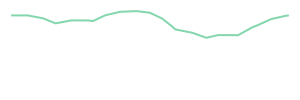

In [19]:
import shapely.geometry as sgeom
import cartopy.crs as ccrs

destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

waypoints = [(places[place]['lon'], places[place]['lat'])
             for place in destinations]

line = sgeom.LineString(waypoints)
pc = ccrs.PlateCarree()

foggs_plan = pc.project_geometry(line, ccrs.Geodetic())
foggs_plan

Now, let's get hold of a set of geometries that represent "land". Cartopy has convenience routines to help us do that, but let's start with the manual approach:

In [20]:
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

land_shp_fname = '../../resources/land/ne_110m_land.shp'
# Cartopy actually has a convenient interface to auto-download
# this (and many other) file(s) if we want.
# land_shp_fname = cartopy.io.shapereader.natural_earth(
#     resolution='110m', category='physical', name='land')

land_geoms = list(shpreader.Reader(land_shp_fname).geometries())

Now, let's combine this collection of geometries into a single shapely MultiPolygon using [shapely.ops.unary_union](http://shapely.readthedocs.io/en/stable/manual.html#shapely.ops.unary_union). This actually results in an invalid geometry - it isn't clear if this is a problem with the dataset or the underlying geometry library, but either way a quick fix is to "buffer the geometry by 0".

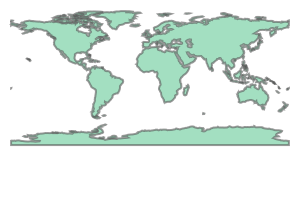

In [21]:
from shapely.ops import unary_union

land = unary_union(land_geoms).buffer(0)
land

Finally we are ready to start using this geometry:

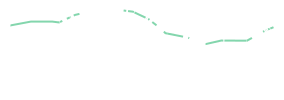

In [22]:
foggs_land_plan = land.intersection(foggs_plan)
foggs_land_plan

In [23]:
import numpy as np
import cartopy.geodesic

def linestring_distance(geometry):
    """
    A function that returns the geodetic distance of a [Multi]LineString
    
    """
    ls_type = (sgeom.LineString, sgeom.MultiLineString)
    if not isinstance(geometry, ls_type):
        raise TypeError('The given geometry is not a [Multi]LineString')

    if isinstance(geometry, sgeom.MultiLineString):
        return sum(linestring_distance(geom) for geom in geometry.geoms)
    else:
        coords = np.array(geometry.coords)
        geod = cartopy.geodesic.Geodesic()
        distances, azi_0, azi_1 = np.array(
            geod.inverse(coords[:-1], coords[1:]).T)
        return distances.sum()

**Exercise 4.3: ** Using the function above, calculate the distance of the planned route over land.

For completeness, we've added additional material in the [appendix](../../appendix/vector_to_vector/1880_countries_route.ipynb) that briefly discusses the cartopy shapefile reader interface, which you can explore in your own time.

In [24]:
# EXERCISE 4.3:
distance = linestring_distance(foggs_plan)
land_distance = linestring_distance(foggs_land_plan)
print("Fogg's planned route is approximately {:.0f} km. "
      "{:.0f} km of that is over land"
      .format(distance / 1000, land_distance / 1000))


Fogg's planned route is approximately 33039 km. 15071 km of that is over land



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 4.3</b></summary>
<pre>
distance = linestring_distance(foggs_plan)
land_distance = linestring_distance(foggs_land_plan)
print("Fogg's planned route is approximately {:.0f} km. "
      "{:.0f} km of that is over land"
      .format(distance / 1000, land_distance / 1000))
</pre>
</details>

For completeness, we've added additional material in the [appendix](../../appendix/vector_to_vector/1880_countries_route.ipynb) that briefly discusses the cartopy shapefile reader interface, which you can explore in your own time.

## Rendering vector data in the browser

Given the route as a geometry, it is easy to produce a quick interactive web map using [folium](https://github.com/python-visualization/folium).

There are other great options out there too, [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) is a great option for tight Jupyter notebook integration, while [GeoViews](http://geo.holoviews.org/) is another option for a HoloViews based interface.

In [25]:
import folium 


m = folium.Map()

style_function = lambda x: {'color': "#808000",
                            'line_opacity': 0.5}
m.add_child(
    folium.GeoJson(
        foggs_plan.__geo_interface__,
        name="Fogg's proposed route",
        style_function=style_function,
    )
)
m.fit_bounds(m.get_bounds())
m